In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
pip install -U nbconvert==5.6.1 --user

Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/connie-chow/datasets/main/train.csv', sep=',')

In [4]:
print(df.describe())

                  id            Age  Driving_License    Region_Code  \
count  381109.000000  381109.000000    381109.000000  381109.000000   
mean   190555.000000      38.822584         0.997869      26.388807   
std    110016.836208      15.511611         0.046110      13.229888   
min         1.000000      20.000000         0.000000       0.000000   
25%     95278.000000      25.000000         1.000000      15.000000   
50%    190555.000000      36.000000         1.000000      28.000000   
75%    285832.000000      49.000000         1.000000      35.000000   
max    381109.000000      85.000000         1.000000      52.000000   

       Previously_Insured  Annual_Premium  Policy_Sales_Channel  \
count       381109.000000   381109.000000         381109.000000   
mean             0.458210    30564.389581            112.034295   
std              0.498251    17213.155057             54.203995   
min              0.000000     2630.000000              1.000000   
25%              0.000000

In [5]:
print(df.head())

   id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   1    Male   44                1         28.0                   0   
1   2    Male   76                1          3.0                   0   
2   3    Male   47                1         28.0                   0   
3   4    Male   21                1         11.0                   1   
4   5  Female   29                1         41.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0   > 2 Years            Yes         40454.0                  26.0      217   
1    1-2 Year             No         33536.0                  26.0      183   
2   > 2 Years            Yes         38294.0                  26.0       27   
3    < 1 Year             No         28619.0                 152.0      203   
4    < 1 Year             No         27496.0                 152.0       39   

   Response  
0         1  
1         0  
2         1  
3         0  
4         0  


In [6]:
print(df.isnull().values.any())

False


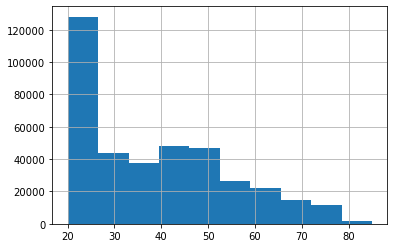

In [7]:
# most drivers are 20-25 age
df['Age'].hist()
plt.show()

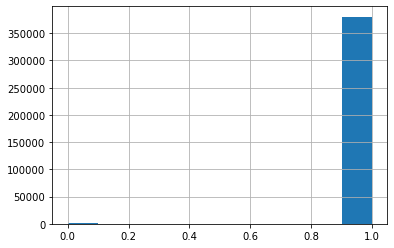

In [8]:
# almost everyone has a license
df['Driving_License'].hist()
plt.show()

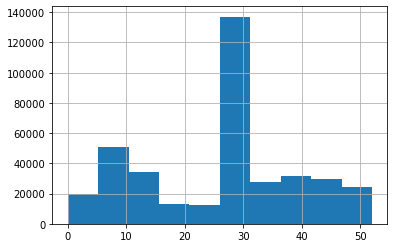

In [9]:
# most live in region of 28?
df['Region_Code'].hist()
plt.show()

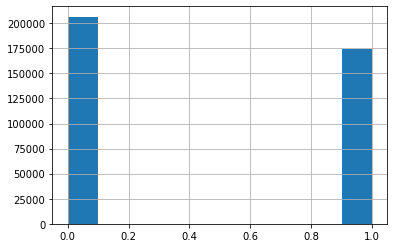

In [10]:
# half the people were and were not previously insured
df['Previously_Insured'].hist()
plt.show()

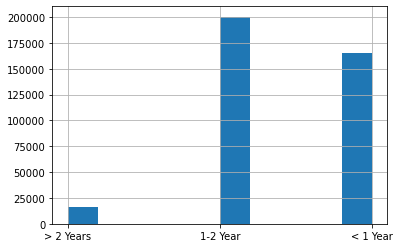

In [11]:
# most vehicles are less than 2 years of age
df['Vehicle_Age'].hist()
plt.show()

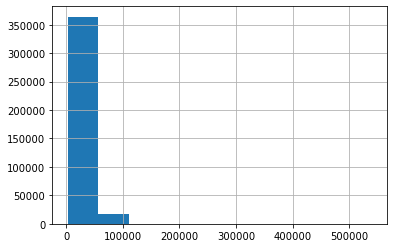

In [12]:
# most people pay the lowest annual premium
df['Annual_Premium'].hist()
plt.show()

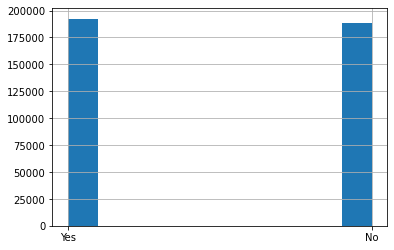

In [13]:
# half the people had vehicle damage and half not
df['Vehicle_Damage'].hist()
plt.show()

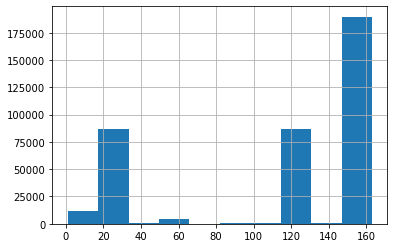

In [14]:
# sales channel 150 seems to bring in the most business
df['Policy_Sales_Channel'].hist()
plt.show()

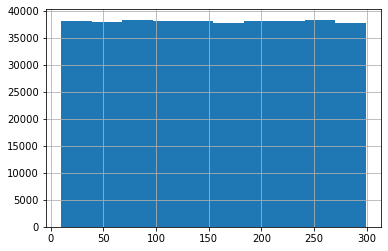

In [15]:
# pretty even distribution
df['Vintage'].hist()
plt.show()

<AxesSubplot:>

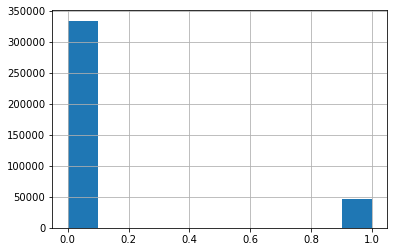

In [16]:
# dataset is not balanced
# small percentage of people are responding yes to cross sell offer which is expected
df['Response'].hist()

<AxesSubplot:>

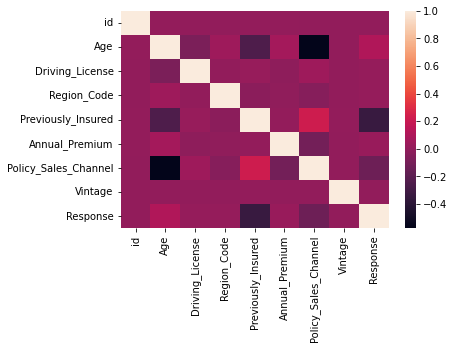

In [17]:
# High correlation
# Policy_Sales_Channel to Previously_Insured
sns.heatmap(df.corr())

In [18]:
# Correlation to Target
# Age has highest relevance
# The annual premium, where the customer lives and whether or not they have a driver's license
# oppositely correlated is if the customer has been previously insured, no correlation
print(df.corr()['Response'].sort_values(ascending=False))

Response                1.000000
Age                     0.111147
Annual_Premium          0.022575
Region_Code             0.010570
Driving_License         0.010155
Vintage                -0.001050
id                     -0.001368
Policy_Sales_Channel   -0.139042
Previously_Insured     -0.341170
Name: Response, dtype: float64


In [19]:
# Possible Feature Engineering
# breakup Age into young adult, middle age, senior citizens


In [20]:
# Check outliers

In [21]:
# Bin 'Age' column categories:
# Ages 0 to 3: Toddler
# Ages 4 to 17: Child
# Ages 18 to 25: Young Adult
# Ages 26 to 64: Adult
# Ages 65 to 99: Elder
'''
new_df = df.copy()
new_df['Age'] = pd.cut(new_df['Age'], bins=[0,3,17,25,64,99],
                       labels=['Toddler', 'Child', 'Young Adult', 'Adult', 'Elder'])

print(new_df)
'''

"\nnew_df = df.copy()\nnew_df['Age'] = pd.cut(new_df['Age'], bins=[0,3,17,25,64,99],\n                       labels=['Toddler', 'Child', 'Young Adult', 'Adult', 'Elder'])\n\nprint(new_df)\n"

In [22]:
# Bin 'Vintage' column - so it's the number of days the customer has been with the business
# Ages 0 to 3: Toddler
# Ages 4 to 17: Child
# Ages 18 to 25: Young Adult
# Ages 26 to 64: Adult
# Ages 65 to 99: Elder
'''
# looks like an even distribution
new_df['Vintage'].hist()
plt.show()

df_temp = new_df.copy()
df_temp['Vintage'] = pd.cut(df_temp['Vintage'], bins=[0,91,183,274, 365],
                       labels=['Q1', 'Q2', 'Q3', 'Q4'])

print(df_temp)
'''

"\n# looks like an even distribution\nnew_df['Vintage'].hist()\nplt.show()\n\ndf_temp = new_df.copy()\ndf_temp['Vintage'] = pd.cut(df_temp['Vintage'], bins=[0,91,183,274, 365],\n                       labels=['Q1', 'Q2', 'Q3', 'Q4'])\n\nprint(df_temp)\n"

In [23]:
# Bin 'Region_Code' column - so it's the number of days the customer has been with the business
# Ages 0 to 3: Toddler
# Ages 4 to 17: Child
# Ages 18 to 25: Young Adult
# Ages 26 to 64: Adult
# Ages 65 to 99: Elder
'''
# looks like an even distribution
new_df['Region_Code'].hist()
plt.show()

df_temp = new_df.copy()
df_temp['Region_Code'] = pd.cut(df_temp['Region_Code'], bins=[0,15,30,45],
                       labels=['Region1', 'Region2', 'Region3'])

print(df_temp)
'''

"\n# looks like an even distribution\nnew_df['Region_Code'].hist()\nplt.show()\n\ndf_temp = new_df.copy()\ndf_temp['Region_Code'] = pd.cut(df_temp['Region_Code'], bins=[0,15,30,45],\n                       labels=['Region1', 'Region2', 'Region3'])\n\nprint(df_temp)\n"

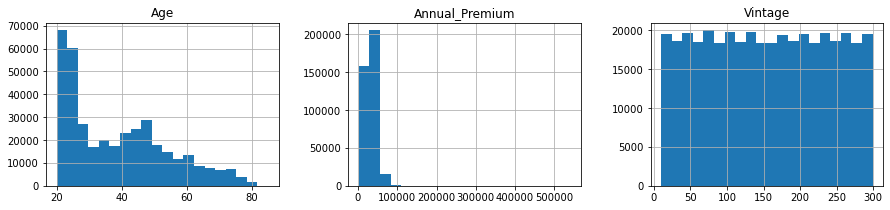

In [24]:
# to view numerical features in charts
num_cols = ['Age', 'Annual_Premium', 'Vintage']
fig, ax = plt.subplots(1, 3, figsize=(15, 3))
df[num_cols].hist(bins=20, figsize=(10, 7), ax=ax)
plt.show()

In [25]:
'''
num_cols = ['Annual_Premium', 'Age', 'Vintage']
fig, ax = plt.subplots(1, 3, figsize=(15, 3))
print(df[df.Response == 0][num_cols])
df[df.Response == 0][num_cols].hist(bins=20, color="blue", alpha=0.5, ax=ax)
df[df.Response == 1][num_cols].hist(bins=20, color="orange", alpha=0.7, ax=ax)
plt.legend(['Accept', 'Reject'], shadow=True, loc=9)
plt.show()
'''

'\nnum_cols = [\'Annual_Premium\', \'Age\', \'Vintage\']\nfig, ax = plt.subplots(1, 3, figsize=(15, 3))\nprint(df[df.Response == 0][num_cols])\ndf[df.Response == 0][num_cols].hist(bins=20, color="blue", alpha=0.5, ax=ax)\ndf[df.Response == 1][num_cols].hist(bins=20, color="orange", alpha=0.7, ax=ax)\nplt.legend([\'Accept\', \'Reject\'], shadow=True, loc=9)\nplt.show()\n'

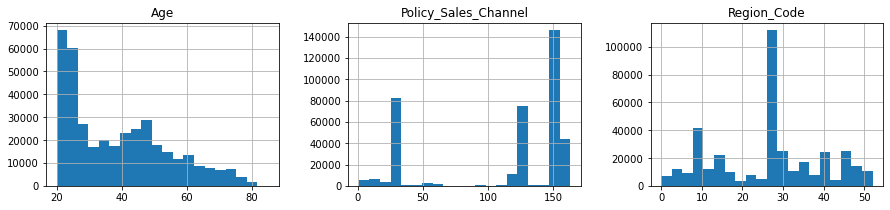

In [26]:
# to view numerical features in charts
num_cols = ['Age', 'Policy_Sales_Channel', 'Region_Code']
fig, ax = plt.subplots(1, 3, figsize=(15, 3))
df[num_cols].hist(bins=20, figsize=(10, 7), ax=ax)
plt.show()

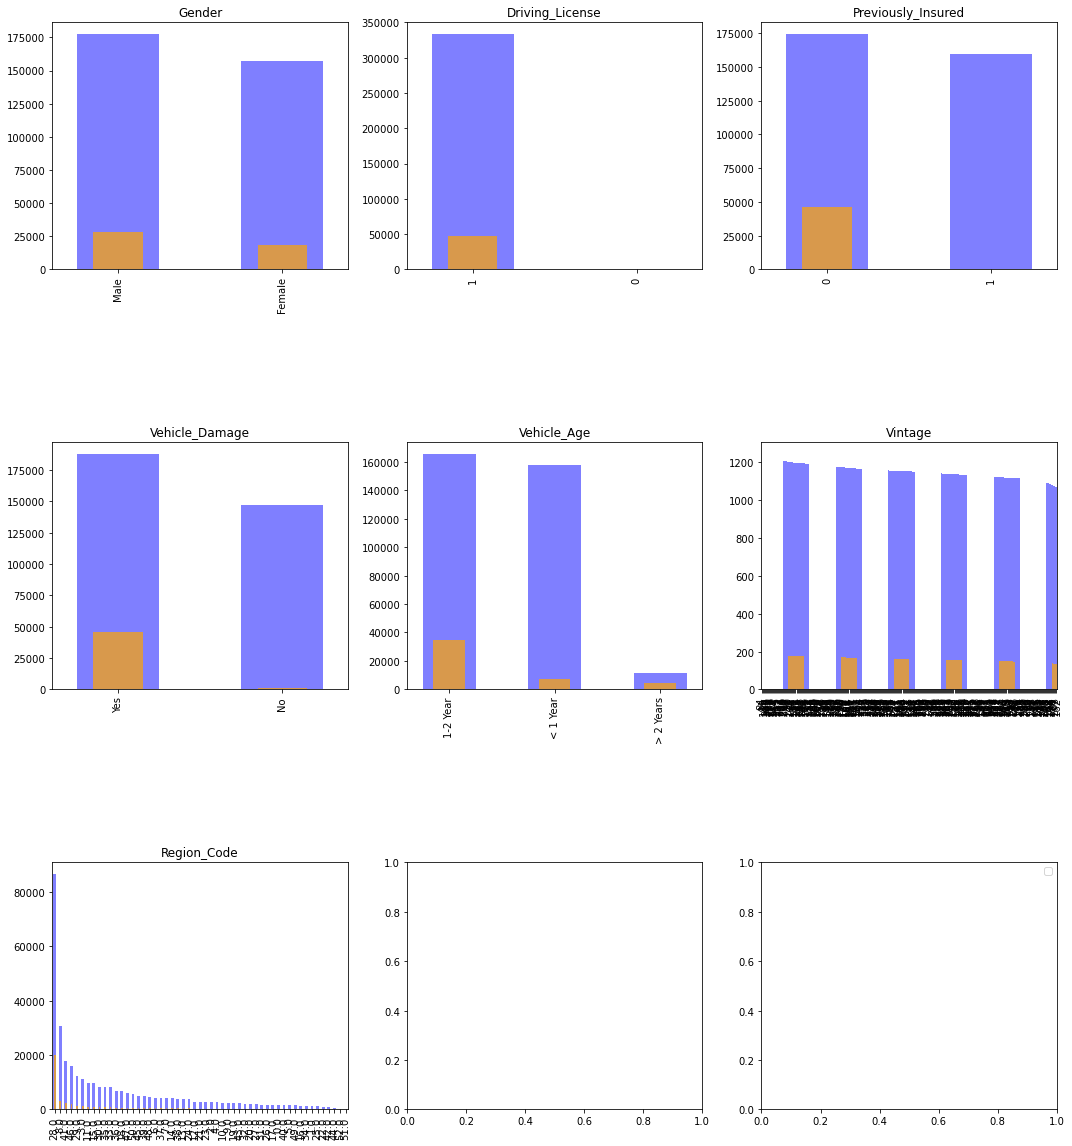

In [27]:
categorical_features = [
 'Gender',
 'Driving_License',
 'Previously_Insured',
 'Vehicle_Damage',
 'Vehicle_Age',
 'Vintage',
 'Region_Code']
#df = df_temp
ROWS, COLS = 3, 3
fig, ax = plt.subplots(ROWS, COLS, figsize=(18, 20) )
row, col = 0, 0
for i, categorical_feature in enumerate(categorical_features):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    df[df.Response == 0][categorical_feature].value_counts().plot(kind = 'bar', 
                width=.5, ax=ax[row, col], color='blue', alpha=0.5).set_title(categorical_feature)
    df[df.Response == 1][categorical_feature].value_counts().plot(kind = 'bar', 
                width=.3, ax=ax[row, col], color='orange', alpha=0.7).set_title(categorical_feature)
    plt.legend(['No', 'Yes'])
    fig.subplots_adjust(hspace=0.7)
    
# https://subscription.packtpub.com/book/data/9781119526810/6/ch06lvl1sec31/42-bar-graphs-with-response-overlay
# how to create normalized graph

<AxesSubplot:xlabel='Region_Code'>

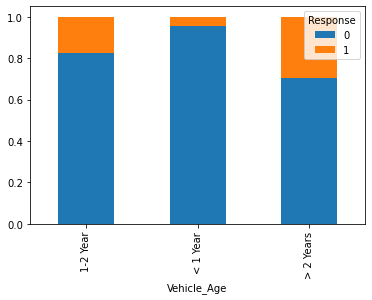

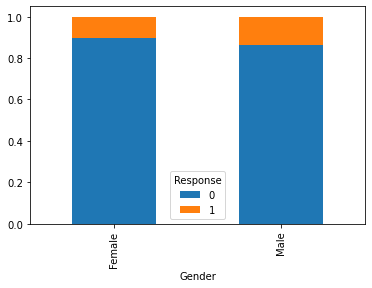

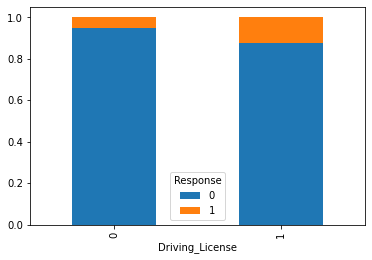

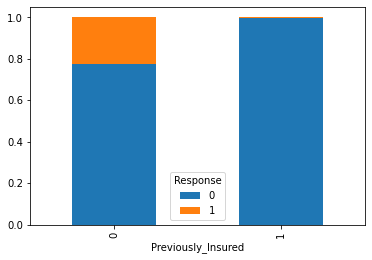

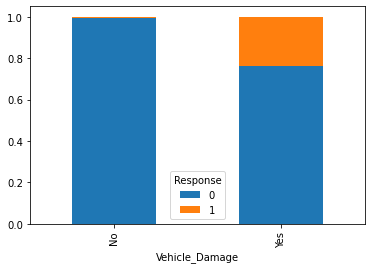

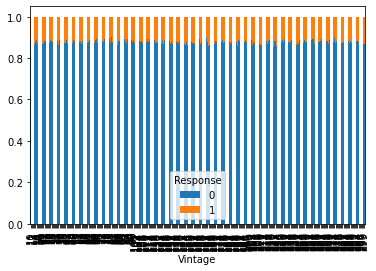

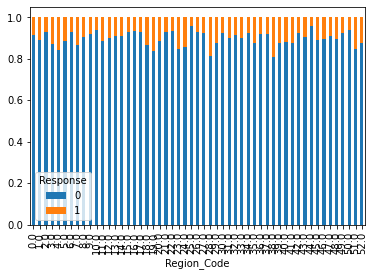

In [28]:
# Normalized bar chart of categorical variables to response

crosstab_01 = pd.crosstab(df['Vehicle_Age'], df['Response'])
#crosstab_01.plot(kind='bar', stacked = True)
crosstab_norm = crosstab_01.div(crosstab_01.sum(1), axis = 0)
crosstab_norm.plot(kind='bar', stacked = True)


crosstab_01 = pd.crosstab(df['Gender'], df['Response'])
#crosstab_01.plot(kind='bar', stacked = True)
crosstab_norm = crosstab_01.div(crosstab_01.sum(1), axis = 0)
crosstab_norm.plot(kind='bar', stacked = True)



crosstab_01 = pd.crosstab(df['Driving_License'], df['Response'])
#crosstab_01.plot(kind='bar', stacked = True)
crosstab_norm = crosstab_01.div(crosstab_01.sum(1), axis = 0)
crosstab_norm.plot(kind='bar', stacked = True)



crosstab_01 = pd.crosstab(df['Previously_Insured'], df['Response'])
#crosstab_01.plot(kind='bar', stacked = True)
crosstab_norm = crosstab_01.div(crosstab_01.sum(1), axis = 0)
crosstab_norm.plot(kind='bar', stacked = True)



crosstab_01 = pd.crosstab(df['Vehicle_Damage'], df['Response'])
#crosstab_01.plot(kind='bar', stacked = True)
crosstab_norm = crosstab_01.div(crosstab_01.sum(1), axis = 0)
crosstab_norm.plot(kind='bar', stacked = True)



crosstab_01 = pd.crosstab(df['Vintage'], df['Response'])
#crosstab_01.plot(kind='bar', stacked = True)
crosstab_norm = crosstab_01.div(crosstab_01.sum(1), axis = 0)
crosstab_norm.plot(kind='bar', stacked = True)


crosstab_01 = pd.crosstab(df['Region_Code'], df['Response'])
#crosstab_01.plot(kind='bar', stacked = True)
crosstab_norm = crosstab_01.div(crosstab_01.sum(1), axis = 0)
crosstab_norm.plot(kind='bar', stacked = True)

In [31]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from collections import defaultdict
from scipy import stats
from sklearn.cluster import KMeans
from pandas.api.types import CategoricalDtype
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
import statsmodels.tools.tools as stattools
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.tree import plot_tree
import random
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import LinearSVC

In [32]:
for col in df.columns:
    print('%s: %d' % (col, df[col].isna().sum()))

id: 0
Gender: 0
Age: 0
Driving_License: 0
Region_Code: 0
Previously_Insured: 0
Vehicle_Age: 0
Vehicle_Damage: 0
Annual_Premium: 0
Policy_Sales_Channel: 0
Vintage: 0
Response: 0


In [33]:
df['Region_Code'].isna().sum()/len(df)

0.0

In [34]:
'''
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='constant', fill_value='missing')
imputer = imputer.fit(df[['Region_Code']])
df[['Region_Code']] = imputer.transform(df[['Region_Code']])
'''

"\nfrom sklearn.impute import SimpleImputer\nimputer = SimpleImputer(strategy='constant', fill_value='missing')\nimputer = imputer.fit(df[['Region_Code']])\ndf[['Region_Code']] = imputer.transform(df[['Region_Code']])\n"

In [35]:
print(df.head(5))

   id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   1    Male   44                1         28.0                   0   
1   2    Male   76                1          3.0                   0   
2   3    Male   47                1         28.0                   0   
3   4    Male   21                1         11.0                   1   
4   5  Female   29                1         41.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0   > 2 Years            Yes         40454.0                  26.0      217   
1    1-2 Year             No         33536.0                  26.0      183   
2   > 2 Years            Yes         38294.0                  26.0       27   
3    < 1 Year             No         28619.0                 152.0      203   
4    < 1 Year             No         27496.0                 152.0       39   

   Response  
0         1  
1         0  
2         1  
3         0  
4         0  


In [38]:
# convert ordinal values
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Vehicle_Age'] = le.fit_transform(df['Vehicle_Age'])


# convert categorical values
df_ohed = pd.get_dummies(df, columns= ['Vehicle_Damage', 'Gender'])


#df['Gender'] = df['Gender'].apply(lambda x: 1 if x=='Female' else 0)
#df['Vehicle_Damage'] = df['Vehicle_Damage'].apply(lambda x: 1 if x=='Yes' else 0)

# get dummies()
#df = df.drop(columns=['Response'])
# columns of 0 or 1, binary do not need to be encoded
#df_ohed = pd.get_dummies(df, columns= ['Age', 'Region_Code', 'Vehicle_Age', 'Policy_Sales_Channel'])
#df.drop(columns=['Gender', 'Age', 'Region_Code', 'Driving_License', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Policy_Sales_Channel', 'Vintage'])
print(df_ohed.head(5))

   id  Age  Driving_License  Region_Code  Previously_Insured  Vehicle_Age  \
0   1   44                1         28.0                   0            2   
1   2   76                1          3.0                   0            0   
2   3   47                1         28.0                   0            2   
3   4   21                1         11.0                   1            1   
4   5   29                1         41.0                   1            1   

   Annual_Premium  Policy_Sales_Channel  Vintage  Response  Vehicle_Damage_No  \
0         40454.0                  26.0      217         1                  0   
1         33536.0                  26.0      183         0                  1   
2         38294.0                  26.0       27         1                  0   
3         28619.0                 152.0      203         0                  1   
4         27496.0                 152.0       39         0                  1   

   Vehicle_Damage_Yes  Gender_Female  Gender_Male 

Text(0.5, 1.0, 'Top Features derived by Random Forest')

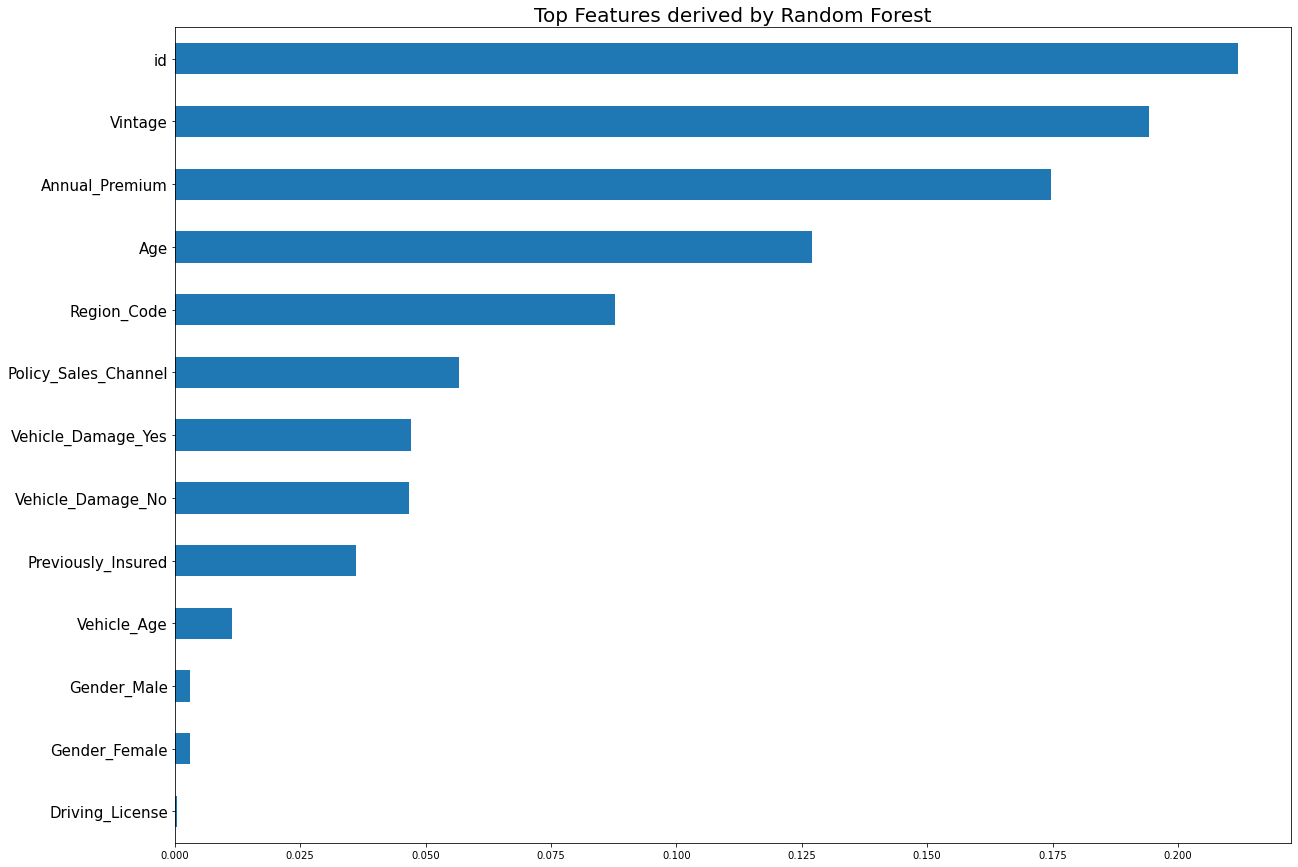

In [40]:
## To look for top features using Random Forest
# Create decision tree classifer object
X = df_ohed.drop(columns=['Response'])
y = df_ohed['Response']
rfc = RandomForestClassifier(random_state=0, n_estimators=100)

# Train model, note that NO scaling is required
model = rfc.fit(X, y)

# Plot the top features based on its importance
(pd.Series(model.feature_importances_, index=X.columns)
   .nlargest(47)   # can adjust based on how many top features you want
   .plot(kind='barh', figsize=[20,15])
    .invert_yaxis()) # Ensures that the feature with the most importance is on top, in descending order

plt.yticks(size=15)
plt.title('Top Features derived by Random Forest', size=20)

   id  Age  Driving_License  Region_Code  Previously_Insured  Vehicle_Age  \
0   1   44                1         28.0                   0            2   
1   2   76                1          3.0                   0            0   
2   3   47                1         28.0                   0            2   
3   4   21                1         11.0                   1            1   
4   5   29                1         41.0                   1            1   

   Annual_Premium  Policy_Sales_Channel  Vintage  Vehicle_Damage_No  \
0         40454.0                  26.0      217                  0   
1         33536.0                  26.0      183                  1   
2         38294.0                  26.0       27                  0   
3         28619.0                 152.0      203                  1   
4         27496.0                 152.0       39                  1   

   Vehicle_Damage_Yes  Gender_Female  Gender_Male  
0                   1              0            1  
1     

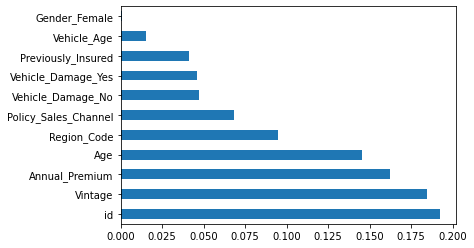

In [41]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
print(X.head(5))
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based clas
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.show()

In [56]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_classif

# chi2 for categorical variables
# mutual_info_classif for mixed variables
   
fs = SelectKBest(score_func=mutual_info_classif, k='all')
fs.fit(X, y)
X_train_fs = fs.transform(X)

print(fs.scores_)

#for i in range(len(fs.scores_)):
#    print('%s: %f' % (df.columns[i], fs.scores_[i]))

plt.figure(figsize=(18,8))
sns.barplot(X.columns, fs.scores_, orient='h')
plt.title('Categorical Feature Selection with mutual_info_classif')
plt.show()

[2.90998777e-04 3.15509964e-02 7.42898176e-02 1.50778705e-02
 9.93621924e-02 4.26593686e-02 3.63986009e-03 5.91735999e-02
 8.69503188e-05 1.02183595e-01 9.43958053e-02 1.87761458e-02
 2.22163726e-02]


C:\Users\Connie\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


TypeError: Horizontal orientation requires numeric `x` variable.

<Figure size 1296x576 with 0 Axes>

In [54]:
!pip install dmba==0.0.18
from dmba import classificationSummary

In [55]:
#NN
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier

scaleInput = MinMaxScaler()
scaleInput.fit(X * 1.0)

neuralNet = MLPClassifier(hidden_layer_sizes=(10), activation='logistic', solver='lbfgs', max_iter=3000, 
                          random_state=1)
neuralNet.fit(scaleInput.transform(X), y)

print('Neural Network - training results')
classificationSummary(y, neuralNet.predict(scaleInput.transform(X)))
#print('Neural Network - validation results')
#classificationSummary(y_test, neuralNet.predict(scaleInput.transform(X_test)))

Neural Network - training results
Confusion Matrix (Accuracy 0.8775)

       Prediction
Actual      0      1
     0 334331     68
     1  46634     76


In [ ]:
# 5-fold cross-validation on multiple models

logreg = LogisticRegression(solver='liblinear')
knn = KNeighborsClassifier(n_neighbors=20)
clf = tree.DecisionTreeClassifier(max_depth=3)
rfc = RandomForestClassifier(n_estimators = 100, random_state = 123, max_depth = 9, criterion = "gini")
gnb = GaussianNB()
lsvc = LinearSVC()

def runCV(model_name, model_obj, X_set, y_set):
    accuracy = cross_val_score(model_obj, X_set, y_set, cv=5, scoring='accuracy').mean()
    avg_precision = cross_val_score(model_obj, X_set, y_set, cv=5, scoring='average_precision').mean()
    f1 = cross_val_score(model_obj, X_set, y_set, cv=5, scoring='f1').mean()
    precision = cross_val_score(model_obj, X_set, y_set, cv=5, scoring='precision').mean()
    recall = cross_val_score(model_obj, X_set, y_set, cv=5, scoring='recall').mean()
    roc_auc = cross_val_score(model_obj, X_set, y_set, cv=5, scoring='roc_auc').mean()

    print('%s: training accuracy score: %f' % (model_name, accuracy))
    print('%s: training avg precision score: %f' % (model_name, avg_precision))
    print('%s: training f1 score: %f' % (model_name, f1))
    print('%s: training precision score: %f' % (model_name, precision))
    print('%s: training recall score: %f' % (model_name, recall))
    print('%s: training roc auc score: %f' % (model_name, roc_auc))

X = df.drop(columns=['Response'])
y = df['Response']
runCV('Logistic Regression', logreg, X, y)
runCV('KNN', knn, X, y)
runCV('Decision Tree', clf, X, y)
runCV('Random Forest', rfc, X, y)
runCV('Gaussian Naive Bayes', gnb, X, y)
runCV('Linear SVC', lsvc, X, y)

In [ ]:
https://github.com/anjalysam/Health-Insurance-Cross-Sell-Prediction/blob/main/Health_Insurance.ipynb
    https://stackoverflow.com/questions/65722374/one-hot-encoding-in-random-forest-classifier
        https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931
            
# You use LabelEncoder when the categorical column values are ordinal
# Use get_dummies() when the categorical column values are nominal
# https://stats.stackexchange.com/questions/369428/deciding-between-get-dummies-and-labelencoder-for-categorical-variables-in-a-lin